<a href="https://colab.research.google.com/github/micah-shull/pipelines/blob/main/pipelines_1703_feature_selection_dimension_reduction_00.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Dimensionality Reduction for Categorical Data with Many Categories

### Why Dimension Reduction?
* **Computational Efficiency:** A high number of categories can lead to a large number of features after one-hot encoding, which can slow down model training and prediction.
* **Overfitting:** High dimensionality can increase the risk of overfitting, as the model might capture noise in the data rather than underlying patterns.
* **Interpretability:** Reducing the number of features can make it easier to understand the model's decisions.

### Techniques for Dimension Reduction
* **Feature Selection:** Identifying and removing irrelevant or redundant features.
  * Methods include: correlation analysis, chi-squared test, mutual information, and tree-based feature importance.
* **Feature Extraction:** Creating new features from existing ones.
  * Methods include: Principal Component Analysis (PCA) for numerical data, Factor Analysis for latent variables, and techniques like target encoding or frequency encoding for categorical data.
* **Binning:** Grouping categories into fewer, more general categories.
* **Embedding Techniques:** Representing categorical variables as dense vectors in a lower-dimensional space. This is commonly used in natural language processing but can also be applied to other categorical data.

### Considerations
* **Domain Knowledge:** Understanding the meaning of the categories can help in selecting appropriate techniques.
* **Model Requirements:** Some models handle high dimensionality better than others.
* **Data Loss:** Dimensionality reduction inevitably involves some loss of information. It's essential to balance the reduction in dimensionality with the preservation of relevant information.

**In summary,** while dimension reduction can be a valuable tool for handling categorical data with many categories, it's important to carefully consider the specific characteristics of your data and the goals of your analysis before applying any techniques.

**Would you like to explore specific examples or discuss a particular dataset?**


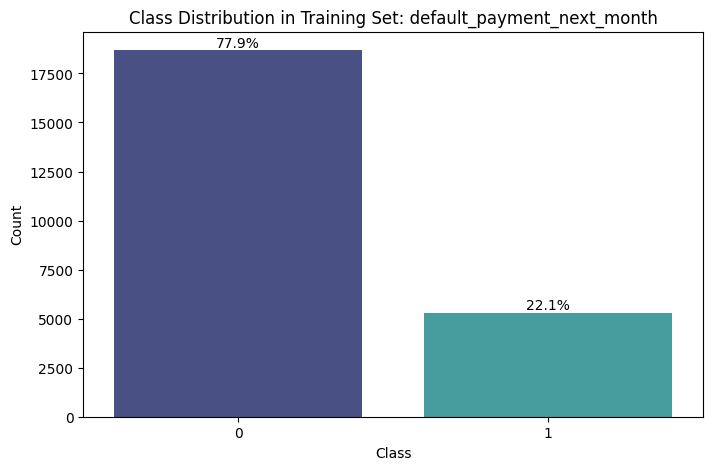

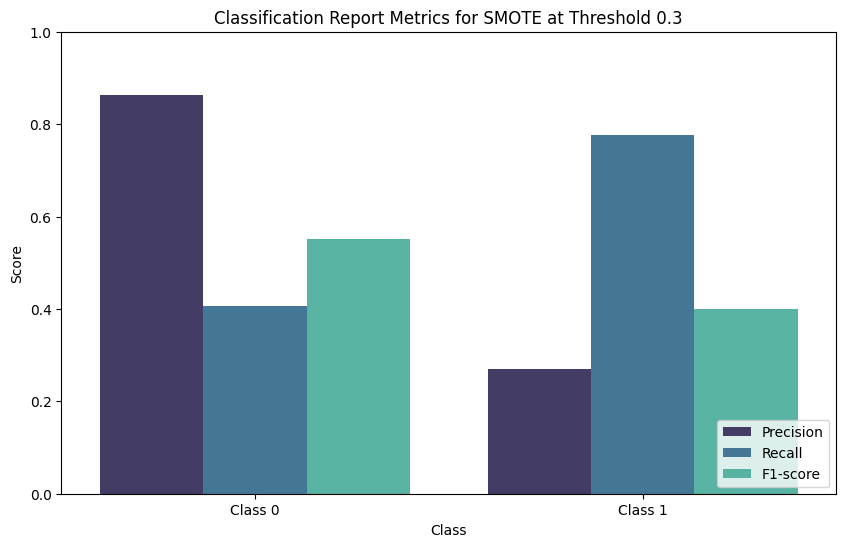

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
import json
import warnings
from loan_data_utils import load_and_preprocess_data, plot_class_distribution, plot_classification_report_metrics

# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define your URL, categorical columns, and target
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['sex', 'education', 'marriage']
target = 'default_payment_next_month'

# Load and preprocess data
X, y = load_and_preprocess_data(url, categorical_columns, target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['category']).columns.tolist()

# Define the column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first'))
        ]), categorical_features)
    ])


# Load the classification reports from the JSON file
with open('resampling_comparison_results.json', 'r') as f:
    results = json.load(f)

# Extract the classification report for SMOTE at threshold 0.3
smote_threshold_0_3_report = results['SMOTE']['Threshold 0.3']

# plot target distribution
plot_class_distribution(y_train, target)
# Plot the classification report metrics for SMOTE at threshold 0.3
plot_classification_report_metrics(smote_threshold_0_3_report, 'SMOTE', '0.3')

## Enhancing Dimension Reduction and Feature Selection

Let's incorporate various techniques for dimension reduction and feature selection into your pipeline. Here's how you can integrate these methods:

1. **Feature Selection Methods:**
   - **Correlation Analysis:** For numerical features.
   - **Chi-Squared Test:** For categorical features.
   - **Mutual Information:** For both numerical and categorical features.
   - **Tree-Based Feature Importance:** Using models like RandomForestClassifier to determine feature importance.

2. **Feature Extraction Methods:**
   - **Principal Component Analysis (PCA):** For numerical data.
   - **Factor Analysis:** For latent variable extraction.
   - **Target Encoding or Frequency Encoding:** For categorical data.

3. **Binning:**
   - Grouping continuous variables into bins or grouping categorical levels.

4. **Embedding Techniques:**
   - Representing categorical variables as dense vectors.

### Explanation:
1. **Feature Extraction with PCA:** Applied to numerical features to reduce dimensionality.
2. **Feature Selection:**
   - **SelectKBest:** Selects the top k features based on mutual information.
   - **Tree-Based Feature Selection:** Uses feature importance from a RandomForestClassifier.
3. **Custom Binning Transformer:** Example of how to bin numerical features (not included in the final pipeline but provided for reference).

This pipeline includes both preprocessing and feature selection steps before fitting the model. Adjust the parameters as needed to better suit your dataset and objectives.

## Correlation Analysis for Numerical Features

**Correlation Analysis for Numerical Features:**
This method aims to identify and remove highly correlated numerical features from the dataset. It identifies and removes features that are highly correlated to each other, not to the target. Features with high correlation (above a certain threshold) are redundant, as they carry similar information. By removing these redundant features, we reduce multicollinearity, which can improve model performance and interpretability.


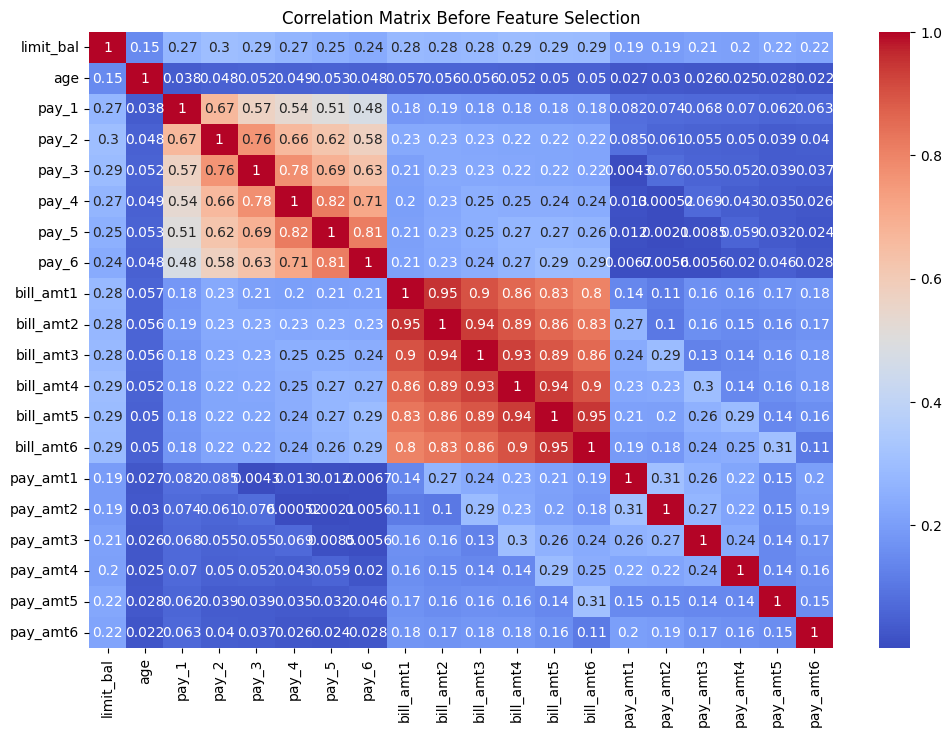

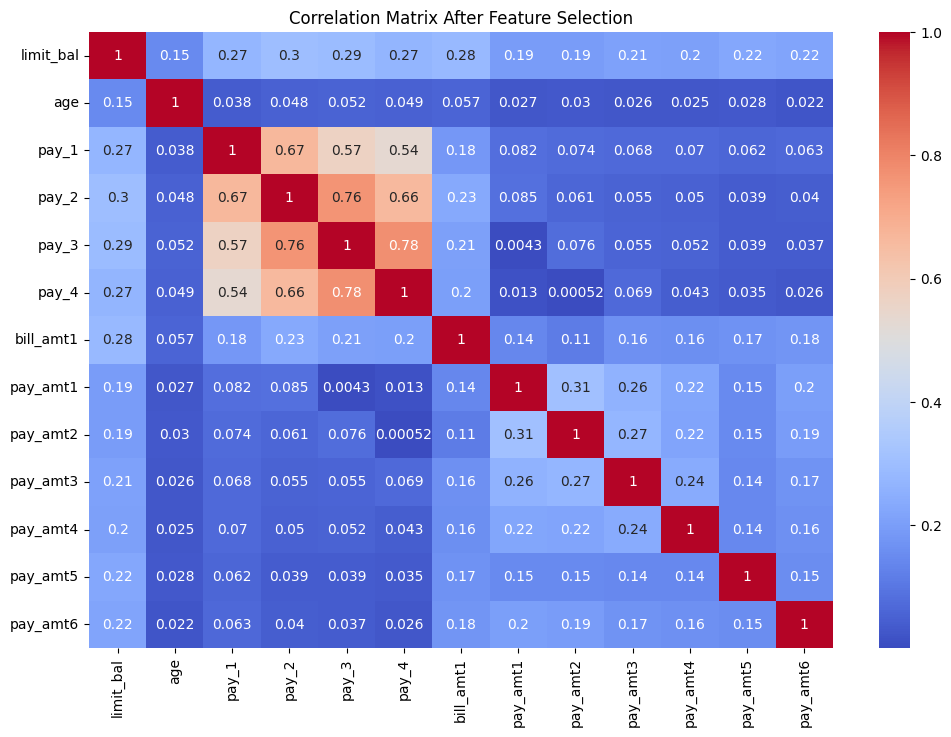

Classification Report (Correlation Analysis):
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.68      0.24      0.36      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import json
import warnings
from loan_data_utils import load_and_preprocess_data, plot_class_distribution, plot_classification_report_metrics

# Suppress warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Define your URL, categorical columns, and target
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"
categorical_columns = ['sex', 'education', 'marriage']
target = 'default_payment_next_month'

# Load and preprocess data
X, y = load_and_preprocess_data(url, categorical_columns, target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Identify numeric and categorical columns
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['category']).columns.tolist()

# Correlation Analysis
corr_matrix = X_train[numeric_features].corr().abs()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Before Feature Selection')
plt.show()

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.8)]
X_train_corr = X_train.drop(columns=to_drop)
X_test_corr = X_test.drop(columns=to_drop)

# Update numeric_features after dropping correlated columns
numeric_features_corr = X_train_corr.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Correlation matrix after feature selection
corr_matrix_after = X_train_corr[numeric_features_corr].corr().abs()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_after, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix After Feature Selection')
plt.show()

# Define the column transformer
preprocessor_corr = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features_corr),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first'))
        ]), categorical_features)
    ])

# Define the logistic regression pipeline
pipeline_corr = Pipeline(steps=[
    ('preprocessor', preprocessor_corr),
    ('classifier', LogisticRegression(max_iter=3000))
])

# Train the model and evaluate
pipeline_corr.fit(X_train_corr, y_train)
y_pred_corr = pipeline_corr.predict(X_test_corr)
print("Classification Report (Correlation Analysis):")
print(classification_report(y_test, y_pred_corr))
classification_report_corr = classification_report(y_test, y_pred_corr, output_dict=True)

# Save the classification report to a JSON file
results = {}
try:
    with open('classification_reports.json', 'r') as f:
        results = json.load(f)
except FileNotFoundError:
    pass

results['Correlation Analysis'] = classification_report_corr

with open('classification_reports.json', 'w') as f:
    json.dump(results, f, indent=4)


### Chi-Squared Test for Categorical Features Explained

The Chi-Squared test evaluates the independence between categorical features and the target variable. It helps to identify and select the most relevant categorical features that have a significant relationship with the target. This reduces the dimensionality of the dataset and helps the model focus on the most important features.

The Chi-Squared test is a statistical method used to determine if there is a significant association between two categorical variables. In the context of feature selection, it helps identify which categorical features are most relevant to the target variable. Here's how it works:

#### Steps in Chi-Squared Test:

1. **Hypotheses:**
   - **Null Hypothesis (H0):** There is no association between the feature and the target variable.
   - **Alternative Hypothesis (H1):** There is an association between the feature and the target variable.

2. **Contingency Table:**
   - A contingency table is created to display the frequency distribution of the variables. For each category of the feature, we count the number of instances in each category of the target variable.

3. **Expected Frequencies:**
   - Based on the marginal totals of the contingency table, expected frequencies are calculated under the assumption that the null hypothesis is true (i.e., the variables are independent).

4. **Chi-Squared Statistic:**
   - The Chi-Squared statistic is calculated using the formula:
     \[
     \chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}
     \]
     where \( O_i \) is the observed frequency, and \( E_i \) is the expected frequency.

5. **Significance:**
   - The Chi-Squared statistic is compared to a critical value from the Chi-Squared distribution with the appropriate degrees of freedom (based on the number of categories). A high Chi-Squared statistic (and a low p-value) indicates that the null hypothesis can be rejected, meaning there is a significant association between the feature and the target variable.

6. **Feature Selection:**
   - Features with higher Chi-Squared statistics are considered more relevant to the target variable. Using `SelectKBest`, we can select the top `k` features with the highest Chi-Squared statistics.

### Example:

Suppose we have a dataset with a categorical feature "Education Level" and a binary target variable "Default Payment":

| Education Level | Default Payment (Yes) | Default Payment (No) |
|-----------------|-----------------------|----------------------|
| High School     | 50                    | 200                  |
| College         | 30                    | 150                  |
| Graduate        | 20                    | 100                  |

1. **Contingency Table:**
   - Construct a contingency table based on the observed frequencies.

2. **Expected Frequencies:**
   - Calculate the expected frequencies assuming no association between "Education Level" and "Default Payment".

3. **Chi-Squared Statistic:**
   - Calculate the Chi-Squared statistic based on the observed and expected frequencies.

4. **Significance:**
   - Compare the Chi-Squared statistic to the critical value to determine if there is a significant association.



### How SelectKBest with Chi-Squared Test Works

`SelectKBest` is a feature selection method provided by Scikit-learn that allows you to select the top `k` features based on a statistical test. When used with the Chi-Squared test, it helps to identify and select the most relevant categorical features for the target variable.

Here’s how it works step by step:

1. **Feature Encoding:**
   - Categorical features are first encoded into numerical format, usually using techniques like one-hot encoding. This is because the Chi-Squared test requires numerical inputs.

2. **Calculating Chi-Squared Statistic:**
   - For each encoded feature, the Chi-Squared statistic is calculated. This statistic measures the independence of the feature with respect to the target variable.

3. **Ranking Features:**
   - Features are ranked based on their Chi-Squared statistic. Features with higher Chi-Squared values have stronger relationships with the target variable.

4. **Selecting Top Features:**
   - The top `k` features with the highest Chi-Squared statistics are selected. These are the features that are most relevant to the target variable.



## Chi-Squared Test for Categorical Features

In [3]:
from sklearn.feature_selection import SelectKBest, chi2

# Define the column transformer with SelectKBest for categorical features
preprocessor_chi2 = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features_corr),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first')),
            ('selectkbest', SelectKBest(chi2, k=2))
        ]), categorical_features)
    ])

# Define the logistic regression pipeline
pipeline_chi2 = Pipeline(steps=[
    ('preprocessor', preprocessor_chi2),
    ('classifier', LogisticRegression())
])

# Train the model and evaluate
pipeline_chi2.fit(X_train_corr, y_train)
y_pred_chi2 = pipeline_chi2.predict(X_test_corr)
print("Classification Report (Chi-Squared Test):")
print(classification_report(y_test, y_pred_chi2))
classification_report_chi2 = classification_report(y_test, y_pred_chi2, output_dict=True)

# Save the classification report to a JSON file
try:
    with open('classification_reports.json', 'r') as f:
        results = json.load(f)
except FileNotFoundError:
    pass

results['Chi-Squared Test'] = classification_report_chi2

with open('classification_reports.json', 'w') as f:
    json.dump(results, f, indent=4)

Classification Report (Chi-Squared Test):
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.68      0.24      0.35      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



## Mutual Information for Both Numerical and Categorical Features

Mutual Information measures the dependency between each feature and the target variable. It captures both linear and non-linear relationships, making it suitable for selecting relevant features from both numerical and categorical data. This method helps in identifying features that provide the most information about the target variable.


In [4]:
from sklearn.feature_selection import mutual_info_classif

# Define the column transformer with SelectKBest for mutual information
preprocessor_mi = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler()),
            ('selectkbest', SelectKBest(mutual_info_classif, k=10))
        ]), numeric_features_corr),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first')),
            ('selectkbest', SelectKBest(mutual_info_classif, k=2))
        ]), categorical_features)
    ])

# Define the logistic regression pipeline
pipeline_mi = Pipeline(steps=[
    ('preprocessor', preprocessor_mi),
    ('classifier', LogisticRegression())
])

# Train the model and evaluate
pipeline_mi.fit(X_train_corr, y_train)
y_pred_mi = pipeline_mi.predict(X_test_corr)
print("Classification Report (Mutual Information):")
print(classification_report(y_test, y_pred_mi))
classification_report_mi = classification_report(y_test, y_pred_mi, output_dict=True)

# Save the classification report to a JSON file
try:
    with open('classification_reports.json', 'r') as f:
        results = json.load(f)
except FileNotFoundError:
    pass

results['Mutual Information'] = classification_report_mi

with open('classification_reports.json', 'w') as f:
    json.dump(results, f, indent=4)

Classification Report (Mutual Information):
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.70      0.23      0.35      1327

    accuracy                           0.81      6000
   macro avg       0.76      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



## Tree-Based Feature Importance
Using models like RandomForestClassifier, this method determines the importance of each feature based on how well they contribute to predicting the target variable. Features that are more important for making accurate predictions are given higher importance scores. By selecting features with the highest importance scores, we can improve model efficiency and performance.

In [5]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Define the column transformer with SelectFromModel for tree-based feature importance
preprocessor_tree = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features_corr),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('encoder', OneHotEncoder(drop='first'))
        ]), categorical_features)
    ])

# Define the logistic regression pipeline with SelectFromModel
pipeline_tree = Pipeline(steps=[
    ('preprocessor', preprocessor_tree),
    ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100))),
    ('classifier', LogisticRegression())
])

# Train the model and evaluate
pipeline_tree.fit(X_train_corr, y_train)
y_pred_tree = pipeline_tree.predict(X_test_corr)
print("Classification Report (Tree-Based Feature Importance):")
print(classification_report(y_test, y_pred_tree))
classification_report_tree = classification_report(y_test, y_pred_tree, output_dict=True)

# Save the classification report to a JSON file
try:
    with open('classification_reports.json', 'r') as f:
        results = json.load(f)
except FileNotFoundError:
    pass

results['Tree-Based Feature Importance'] = classification_report_tree

with open('classification_reports.json', 'w') as f:
    json.dump(results, f, indent=4)



Classification Report (Tree-Based Feature Importance):
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      4673
           1       0.68      0.23      0.35      1327

    accuracy                           0.81      6000
   macro avg       0.75      0.60      0.62      6000
weighted avg       0.79      0.81      0.77      6000



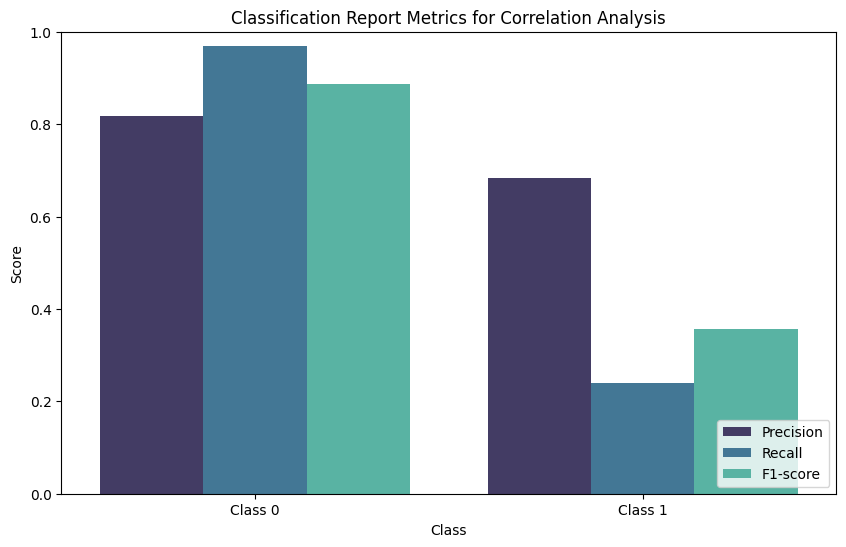

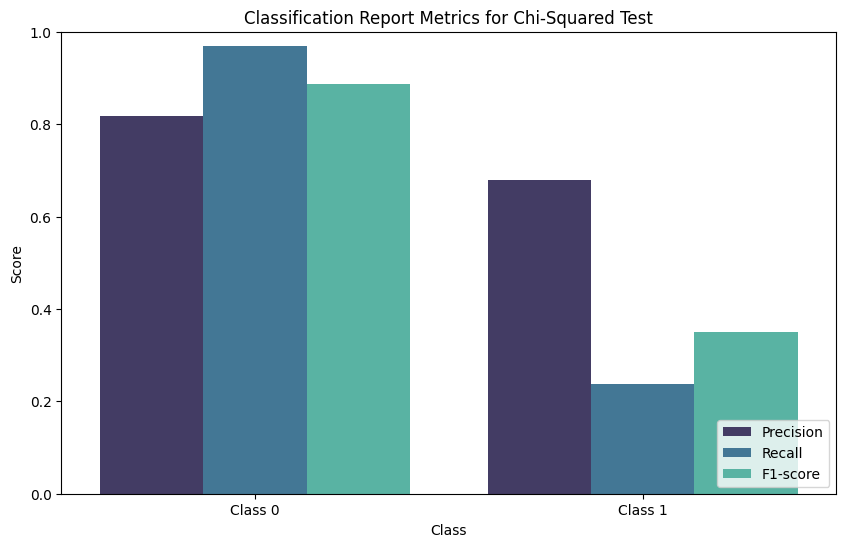

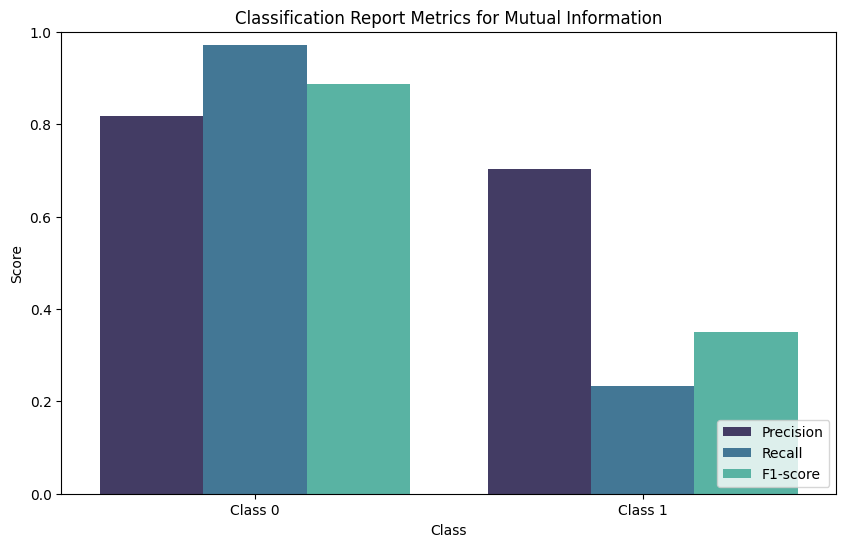

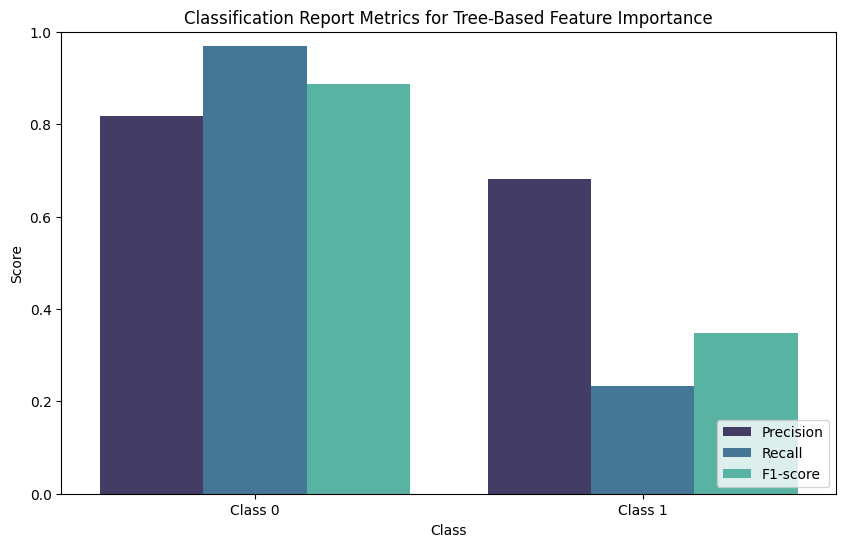

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Function to plot classification report metrics
def plot_classification_report_metrics(report, model_name):
    metrics_df = pd.DataFrame({
        'Class': ['Class 0', 'Class 0', 'Class 0', 'Class 1', 'Class 1', 'Class 1'],
        'Metric': ['Precision', 'Recall', 'F1-score', 'Precision', 'Recall', 'F1-score'],
        'Value': [
            report['0']['precision'],
            report['0']['recall'],
            report['0']['f1-score'],
            report['1']['precision'],
            report['1']['recall'],
            report['1']['f1-score']
        ]
    })

    plt.figure(figsize=(10, 6))
    sns.barplot(x='Class', y='Value', hue='Metric', data=metrics_df, palette='mako')
    plt.title(f'Classification Report Metrics for {model_name}')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(loc='lower right')
    plt.show()

# Load and plot metrics for feature selection methods
with open('classification_reports.json', 'r') as f:
    results = json.load(f)

for method, report in results.items():
    plot_classification_report_metrics(report, method)


#### Loan Data Utils

In [6]:
script_content=r'''
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import joblib
import json
import logging
# Suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger(__name__)

#--------   Load and Preprocess Data   --------#

def load_data_from_url(url):
    try:
        df = pd.read_excel(url, header=1)
        logging.info("Data loaded successfully from URL.")
    except Exception as e:
        logging.error(f"Error loading data from URL: {e}")
        return None
    return df

def clean_column_names(df):
    df.columns = [col.lower().replace(' ', '_') for col in df.columns]
    return df

def remove_id_column(df):
    if 'id' in df.columns:
        df = df.drop(columns=['id'])
    return df

def rename_columns(df):
    rename_dict = {'pay_0': 'pay_1'}
    df = df.rename(columns=rename_dict)
    return df

def convert_categorical(df, categorical_columns):
    df[categorical_columns] = df[categorical_columns].astype('category')
    return df

def split_features_target(df, target):
    X = df.drop(columns=[target])
    y = df[target]
    return X, y

def load_and_preprocess_data(url, categorical_columns, target):
    df = load_data_from_url(url)
    if df is not None:
        df = clean_column_names(df)
        df = remove_id_column(df)
        df = rename_columns(df)
        df = convert_categorical(df, categorical_columns)
        X, y = split_features_target(df, target)
        return X, y
    return None, None

#--------   Plot Class Distribution   --------#


def plot_class_distribution(y_train, target_name):
    plt.figure(figsize=(8, 5))
    sns.countplot(x=y_train, hue=y_train, palette='mako')
    plt.title(f'Class Distribution in Training Set: {target_name}')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.legend([], [], frameon=False)

    # Calculate the percentage for each class
    total = len(y_train)
    class_counts = y_train.value_counts()
    for i, count in enumerate(class_counts):
        percentage = 100 * count / total
        plt.text(i, count, f'{percentage:.1f}%', ha='center', va='bottom')

    plt.show()

#--------   Plot Classification Report Metrics   --------#

def plot_classification_report_metrics(report, method_name, threshold):
    """
    Function to plot the precision, recall, and f1-score metrics for class 0 and class 1.
    """
    # Extract metrics from the report
    metrics_df = pd.DataFrame({
        'Class': ['Class 0', 'Class 0', 'Class 0', 'Class 1', 'Class 1', 'Class 1'],
        'Metric': ['Precision', 'Recall', 'F1-score', 'Precision', 'Recall', 'F1-score'],
        'Value': [
            report['0']['precision'],
            report['0']['recall'],
            report['0']['f1-score'],
            report['1']['precision'],
            report['1']['recall'],
            report['1']['f1-score']
        ]
    })

    # Plot the metrics
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Class', y='Value', hue='Metric', data=metrics_df, palette='mako')
    plt.title(f'Classification Report Metrics for {method_name} at Threshold {threshold}')
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.legend(loc='lower right')
    plt.show()




#--------   Evaluate and Capture Metrics   --------#

# Function to evaluate model
def evaluate_model(pipeline, X_train, X_test, y_train, y_test, model_name, experiment_name):
    logger.info(f"Training and evaluating model: {model_name} ({experiment_name})")

    # Fit the pipeline
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)

    # Capture classification report
    report = classification_report(y_test, y_pred, output_dict=True)

    # Extract relevant metrics
    metrics = {
        'Model': model_name,
        'Experiment': experiment_name,
        'Recall_0': report['0']['recall'],
        'Precision_0': report['0']['precision'],
        'F1_0': report['0']['f1-score'],
        'Recall_1': report['1']['recall'],
        'Precision_1': report['1']['precision'],
        'F1_1': report['1']['f1-score'],
        'F1_Macro': report['macro avg']['f1-score'],
        'Accuracy': report['accuracy']
    }
    return metrics


'''

# Write the script to a file
with open("loan_data_utils.py", "w") as file:
    file.write(script_content)

print("Script successfully written to loan_data_utils.py")
# Reload script to make functions available for use
import importlib
import loan_data_utils
importlib.reload(loan_data_utils)

from loan_data_utils import *

Script successfully written to loan_data_utils.py
